# Introduction

The wind tunnel simulation of low-rise building wind loads has unique challenges related to their small sizes compared to the ABL. One of the challenges is satisfying the Jensen number similitude condition due to failure to model the full boundary layer thickness. ASCE 49-21 allows the limited matching of the lowest atmospheric surface layer instead of the full boundary layer thickness for low-rise buildings. This challenge also results in the lack of achieving equilibrium boundary layer where the velocity and turbulence intensity profiles correspond to different roughness length $z_0$ values. According to Tieleman (2003), priority should be given to the turbulence intensity as a primary target to match.

The conversion factors discussed below are intended to convert a given wind tunnel data (in this case the Concordia tests of the $45^\circ$ gable) from the exposure condition it represents best as fitted by $I_u$ to the standard open terrain condition os $z_0=0.03m$.

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wind
import windCodes

# Conversion factors

The equivalence between codes (and WT) assumes that if all of them are modeling the wind load correctly, the final design pressure $p$ (not coefficient) should be equivalent. So, we start by equating that between both. The procedure is adopted from St. Pierre et al. (2005).

For NBCC, we have:
$$p_{NBCC}=I_wqC_e C_t C_g \bar{C}_p \tag{1a}$$
$$q=0.5\rho U_{10m,z_0=0.03m,1hr}^2  \tag{1b}$$

For wind tunnel data, we have:
$$p_{WT}=q\hat{C}_p  \tag{2a}$$
$$q=0.5 \rho U_{h,z_0,1hr}^2  \tag{2b}$$

The equivalence between NBCC and WT is then:
$$ \left\{ I_w \left( 0.5\rho U_{10m,z_0=0.03m,1hr}^2 \right) C_e C_t C_g \bar{C}_p \right\}_{NBCC} \equiv \left\{ \left( 0.5 \rho U_{h,z_0,1hr}^2 \right) \hat{C}_p \right\}_{WT} \tag{3}$$

Assuming an importance factor ($I_w$), topography factors ($C_t$) of 1 and the same air density for both, we can equate the two wind speeds:
$$ \left\{ U_{10m,z_0=0.03m,1hr}^2 C_e C_g \bar{C}_p \right\}_{NBCC} \equiv \left\{ U_{h,z_0,1hr}^2 \hat{C}_p \right\}_{WT} \tag{4}$$
$$  \left(\frac{U_{10m,z_0=0.03m,1hr}^{NBCC}} { U_{h,z_0,1hr} ^{WT}}\right)^2  \equiv \frac{\hat{C}_p^{WT}} {\left\{C_e C_g \bar{C}_p\right\}_{NBCC}} \tag{5}$$

Therefore, the factor $F_{WT}$ to convert a wind tunnel data conducted for an arbitrary exposure $z_0$, normalized with equivalent mean hourly roof-height wind speed $U_{h,z_0,1hr}$, to the equivalent mean hourly wind speed at $10m$, $U_{10m,z_0=0.03m,1hr}$, in open terrain is:
$$ F_{WT} = \left(\frac{ U_{h,z_0,1hr} ^{WT}} {U_{10m,z_0=0.03m,1hr}^{NBCC}}\right)^2 \tag{6}$$

In expanded form, we have:
$$ F_{WT} = F_{WT}^e F_{WT}^h F_{WT}^t \tag{7a}$$
$$ F_{WT}^e = \left(\frac{U_{10m,z_0,1hr}}{U_{10m,z_0=0.03m,1hr}}\right)^2 \tag{7b}$$
$$ F_{WT}^h = \left(\frac{U_{h,z_0,1hr}}{U_{10m,z_0,1hr}}\right)^2 \tag{7c}$$
$$ F_{WT}^t = \left(\frac{U_{10m,z_0=0.03m,1hr}}{U_{10m,z_0=0.03m,1hr}}\right)^2 = 1.0 \tag{7d}$$

* $F_{WT}^e$ converts the wind tunnel data from the arbitrary exposure to open terrain. 
* $F_{WT}^h$ converts the wind speed from roof height to $10m$. 
* $F_{WT}^t$ converts the gust duration. In this case it is 1.0 because the wind tunnel data has equivalent duration of 1 hour, so no need to convert.

## Concordia experiments


In [19]:
H = 10.5
IuH = 0.126
lScl = 0.01

Z = [0.002,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,]
U = [4.18,7.14,7.61,8.31,8.69,9.21,9.48,9.67,9.86,10.15,10.24,10.43,10.6,10.62,10.9,11.09,11.19,11.38,11.47,11.66,11.76,11.95,11.95,]
Iu = [0.2915,0.1934,0.181,0.164,0.1543,0.136,0.1285,0.1247,0.126,0.12,0.1145,0.1064,0.1047,0.103,0.097,0.096,0.0935,0.0925,0.088,0.0897,0.0845,0.082,0.079,]

# spectFile = r'D:/ConcSpect.csv'
# spect = pd.read_csv(spectFile, header=0, index_col=None)

conc = wind.profile(name='Concordia', Z=Z, H=H*lScl, stats={'U':np.array(U,float), 'Iu':np.array(Iu, float),})

Fitting ESDU profiles (ESDU 1982, 1993) that match the $I_u$ at the mean roof height:

In [4]:
z0, esdu = wind.fitESDUgivenIuRef(Zref=H, 
                                  IuRef=conc.stat_at_H('Iu'), 
                                  ESDUversion='ESDU85', z0i=[1e-4, 1e-1])
print(f'z0 = {z0:.3g} m')

esdu = esdu.toProfileObj()


Zref = 10.5
IuRef = 0.1047
z0 = 0.000213 m


The fitted roughness length is $z_0 = 0.000229 m$. The profile plots below show how it fits the data.

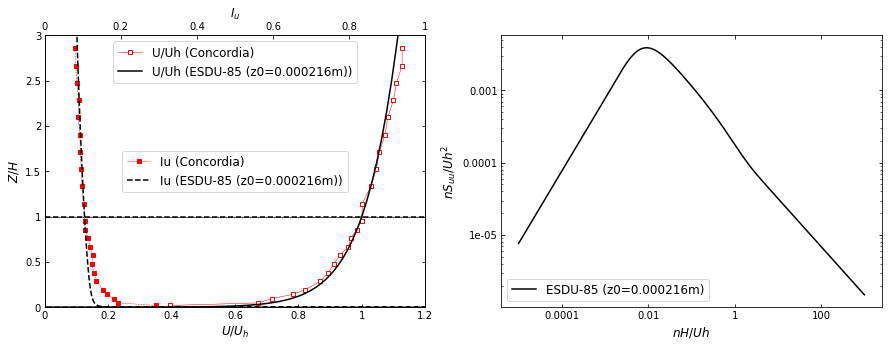

In [5]:
profs = wind.Profiles([conc, esdu,])

profs.plot(figsize=[15,5], 
           kwargs_profile=[{'xLimits_U':[0, 1.2], 'xLimits_Iu':[0, 1], 'yLimits':[0, 3],
                    'kwargs_U':{'color': 'r', 'linestyle': '-', 'marker': 's', 'markersize':4, 'markerfacecolor':'w', 'lw':0.5}, 
                    'kwargs_Iu':{'color': 'r', 'linestyle': '--', 'marker': 's', 'markersize':4, 'markerfacecolor':'r', 'lw':0.5}
                    },
                    {'xLimits_U':[0, 1.2], 'xLimits_Iu':[0, 1], 'yLimits':[0, 3],
                    'kwargs_U':{'color': 'k', 'linestyle': '-'}, 
                    'kwargs_Iu':{'color': 'k', 'linestyle': '--'}
                    }
                    ])

### Conversion factors
The assumptions that went into the computation of the conversion factors are:
* A common gradient height of $500 m$ is adopted to compute $F_{WT}^e$ in eq. 7b (St. Pierre et al. 2005).
* The longitudinal turbulence intensity is the primary quantity to determine the roughness length $z_0$ of the experiment. This relies on the availability of equilibrium ABL set of profiles from standards, such as ESDU.

In [6]:

windCodes.CpConversionFactor(from_='simulated', to_='NBCC', from_Z=H, from_gustDuration=3600, from_z0=z0, debugMode=True)

Calculating the lumped reference velocity conversion factors for C&C wind loads.
		From 		---> 	 To	===>	Factor
Type		simulated 	---> 	 NBCC
z0		0.000213 		---> 	 0.03	===>	1.51
Z		10.5 		---> 	 10	===>	1.01
gust_dur	3600 		---> 	 3600	===>	1
			COMBINED FACTOR			1.52



1.5196332219986075

The conversion factors are:
$$ F_{WT}^e = 1.5 \tag{8a}$$
$$ F_{WT}^h = 1.01 \tag{8b}$$
$$ F_{WT}^t = 1.0 \tag{8c}$$
$$ F_{WT} = F_{WT}^e F_{WT}^h F_{WT}^t = 1.514 \tag{8d}$$

As expected from the turbulence intensity of the wind tunnel relative the the open exposure condition, the conversion factor increases the $C_p$ values by 51.4%.

# References

1. ASCE/SEI, 2021. Wind tunnel testing for buildings and other structures ASCE/SEI 49-21, ASCE standard. American Society of Civil Engineers, Reston, VA, USA. 
    https://doi.org/10.1061/9780784415740
2. ESDU, 1982. Strong Winds in the Atmospheric Boundary Layer. Part I: mean-hourly wind speeds, Item No. 82026. Eng. Sci. Data Unit, Data Items.
3. ESDU, 1993. Characteristics of atmospheric turbulence near the ground, Part II: single point data for strong winds (neutral atmosphere), Item No. 85020. Eng. Sci. Data Unit, Data Items.
4. St Pierre, L.M., Kopp, G.A., Surry, D., Ho, T.C.E., 2005. The UWO contribution to the NIST aerodynamic database for wind loads on low buildings: Part 2. Comparison of data with wind load provisions. J. Wind Eng. Ind. Aerodyn. 93, 31–59. https://doi.org/10.1016/j.jweia.2004.07.007
5. Tieleman, H.W., 2003. Wind tunnel simulation of wind loading on low-rise structures: a review. J. Wind Eng. Ind. Aerodyn. 91, 1627–1649. https://doi.org/10.1016/j.jweia.2003.09.021
